In [ ]:
#Libraries Used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

##Collecting And Inspecting Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##Data Pre-Processing 

In [ ]:
x=data['Hours'].values.reshape(-1,1)
print(x)
print(x.shape)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
(25, 1)


In [ ]:
y=data['Scores'].values.reshape(-1,1)
print(y)
print(y.shape)

[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]
(25, 1)


##Visualizing Data 

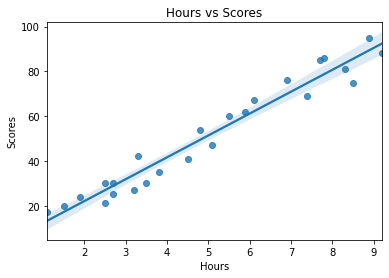

In [ ]:
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

sns.regplot(x=x,y=y)
#this clearly shows a positive corelation

##Defining and Training the model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction=model.predict(x_test)

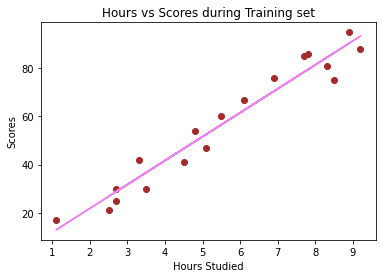

In [ ]:
plt.scatter(x_train, y_train,color='brown')
plt.plot(x_train, model.predict(x_train), color = 'violet')
plt.title('Hours vs Scores during Training set')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

#*PREDICTION METRICS*

In [ ]:

print("MAE {}".format(metrics.mean_absolute_error(y_test,prediction)))
print("MSE {}".format(metrics.mean_squared_error(y_test,prediction)))

MAE 4.130879918502482
MSE 20.33292367497996


##Visualizing the predicted results

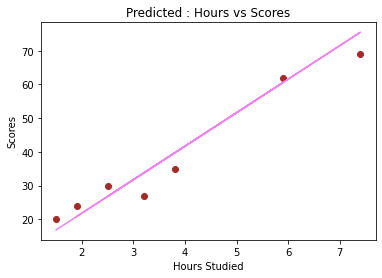

In [ ]:
plt.scatter(x_test, y_test,color='brown')
plt.plot(x_test, model.predict(x_test), color = 'violet')
plt.title('Predicted : Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

##Actual vs predicted 

In [ ]:
result=pd.DataFrame({'y':y_test.flatten(),'predicted':prediction.flatten()})
print(result)

    y  predicted
0  20  16.844722
1  27  33.745575
2  69  75.500624
3  30  26.786400
4  62  60.588106
5  35  39.710582
6  24  20.821393


##Q. What will be the predicted score if a student studies for 9.25hr?